In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as st
from sklearn.linear_model import LinearRegression

In [ ]:
# Create Dataframe from the car sales price data

import pandas as pd
car_df = pd.read_csv('/car_prices.csv')
car_df

In [16]:
# Create a duplicate df to only look at odometer vs sellingprice

regression_df = car_df[['odometer','sellingprice']]


In [21]:
# remove any null values from the dataframe

regression_df = regression_df.dropna()


In [22]:
X = regression_df.iloc[:, :-1].values
y = regression_df.iloc[:, 1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [24]:
x=regression_df.odometer
y = regression_df.sellingprice

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)

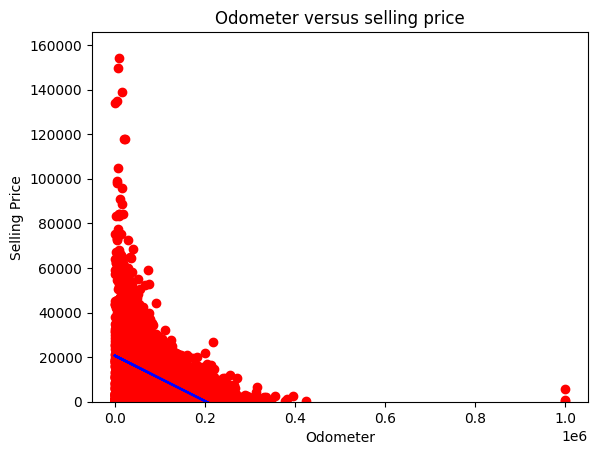

In [32]:
# prompt: visualize the training set results with the minimum y value being 0

#Visualizing Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Odometer versus selling price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.ylim(0, )
plt.show()


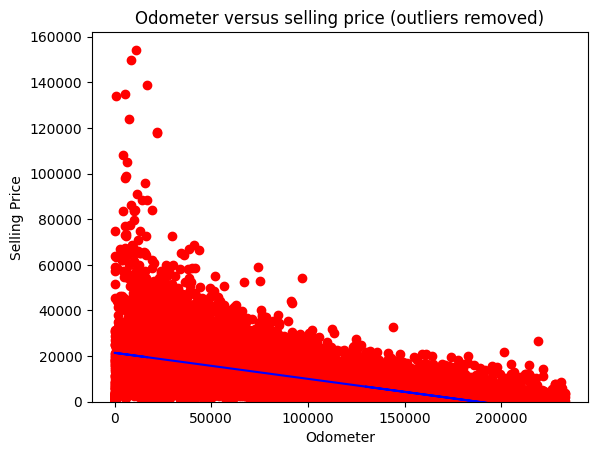

In [36]:
# Remove any outliers to show abetter result

import numpy as np

# Calculate the z-score for each data point
z_scores = np.abs(st.zscore(regression_df['odometer']))

# Define a threshold for outlier identification
threshold = 3

# Select data points that are not outliers
regression_df_filtered = regression_df[z_scores < threshold]

# Update X and y with the filtered data
X = regression_df_filtered.iloc[:, :-1].values
y = regression_df_filtered.iloc[:, 1].values

# Retrain the linear regression model
regressor.fit(X, y)

# Visualize the results with the outliers removed
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Odometer versus selling price (outliers removed)')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.ylim(0, )
plt.show()
